In [1577]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

#Learning curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import validation_curve

In [1578]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [1579]:
combine = [train, test]

In [1580]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


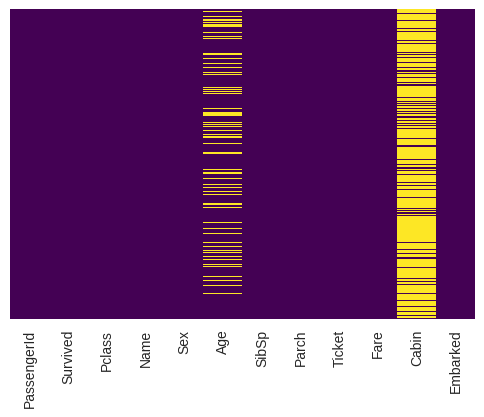

In [1581]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

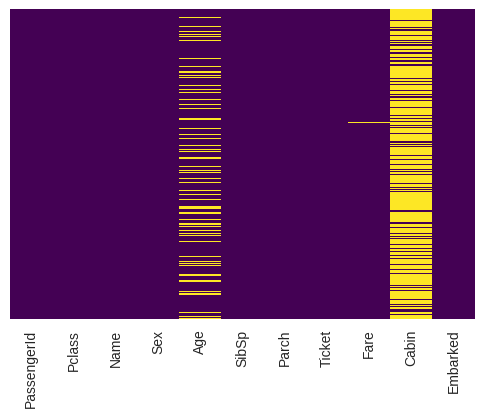

In [1582]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

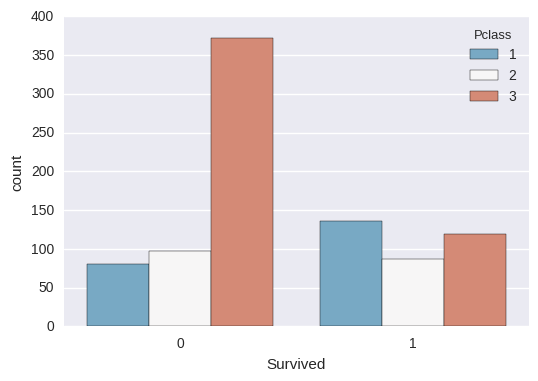

In [1583]:
sns.countplot(x='Survived',hue='Pclass',data=train,palette='RdBu_r')

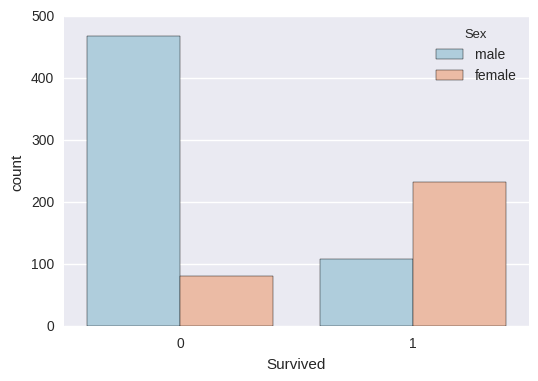

In [1584]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

In [1585]:
#sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

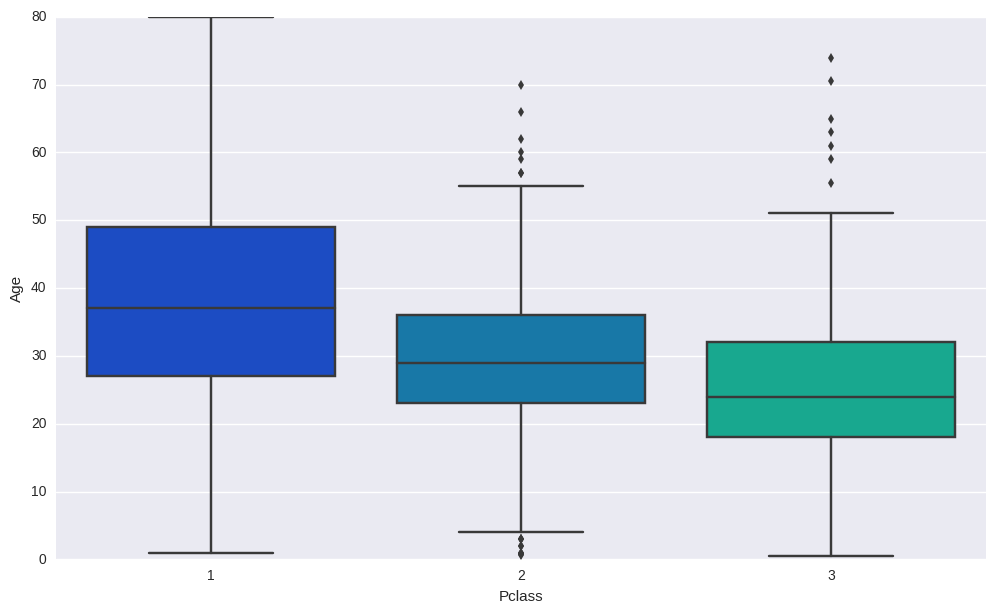

In [1586]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

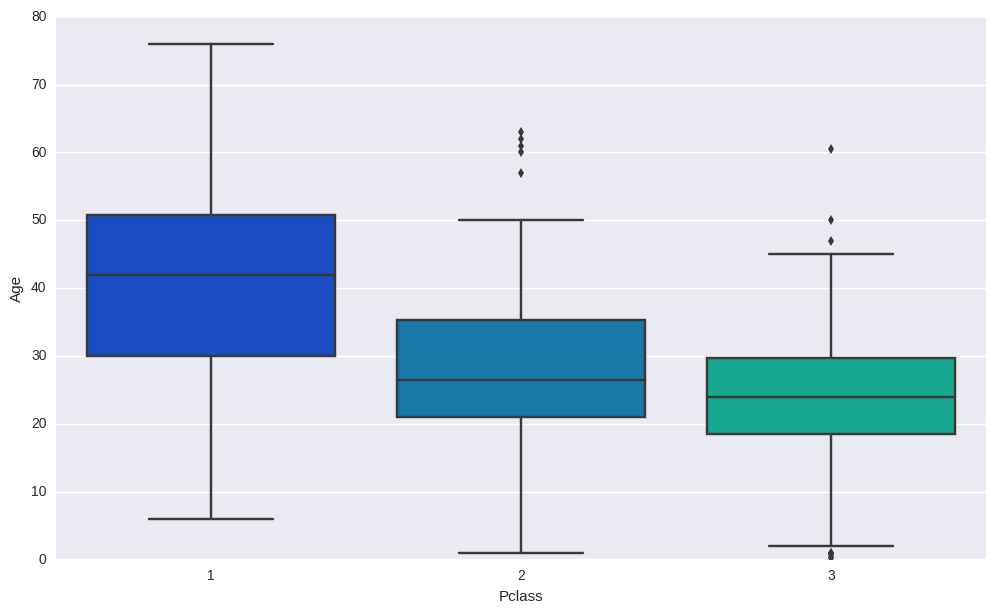

In [1587]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=test,palette='winter')

In [1588]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [1589]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

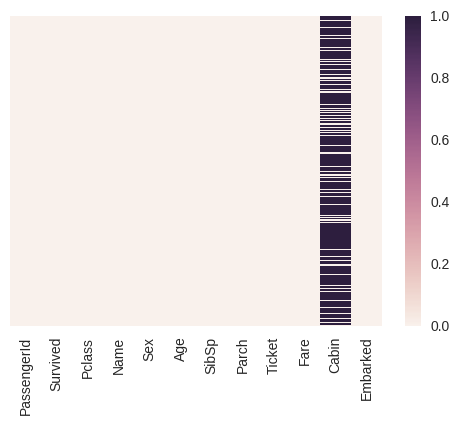

In [1590]:
sns.heatmap(train.isnull(),yticklabels=False)

In [1591]:
#train.drop('Cabin', axis=1, inplace=True)
#test.drop('Cabin', axis=1, inplace=True)

In [1592]:
#train[train.isnull().any(axis=1)]

In [1593]:
#test[test.isnull().any(axis=1)]

In [1594]:
# obtain Title from name (Mr, Mrs, Miss etc)
combine = [train, test]
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)


for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Dona'],'Royalty')
    dataset['Title'] = dataset['Title'].replace(['Mme'], 'Mrs')
    dataset['Title'] = dataset['Title'].replace(['Mlle','Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Major','Rev'], 'Officer')
    dataset['Title'] = dataset['Title'].replace(['Jonkheer', 'Don','Sir'], 'Royalty')
    dataset.loc[(dataset.Sex == 'male')   & (dataset.Title == 'Dr'),'Title'] = 'Mr'
    dataset.loc[(dataset.Sex == 'female') & (dataset.Title == 'Dr'),'Title'] = 'Mrs'

#: count survived rate for different titles
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mrs,0.795276
1,Miss,0.702703
5,Royalty,0.600000
0,Master,0.575000
4,Officer,0.181818
2,Mr,0.158700


In [1595]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [1596]:
# Covert 'Title' to numbers (Mr->1, Miss->2 ...)
title_mapping = {"Mr": 1, "Miss": 6, "Mrs": 5, "Master": 3, "Royalty":4, "Officer": 2}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,5
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,6
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,5
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [1597]:
# Remove 'Name' and 'PassengerId' in training data, and 'Name' in testing data
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name', 'PassengerId'], axis=1)
combine = [train, test]

# if age < 16, set 'Sex' to Child
for dataset in combine:
    dataset.loc[(dataset.Age < 16),'Sex'] = 'Child'
    
# Covert 'Sex' to numbers (female:1, male:2)
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0, 'Child': 2} ).astype(int)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,5
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,6
3,1,1,1,35.0,1,0,113803,53.1000,C123,S,5
4,0,3,0,35.0,0,0,373450,8.0500,NaN,S,1


In [1598]:
def ProcessData(data):
    #sex = pd.get_dummies(data['Sex'],drop_first=True
    embark = pd.get_dummies(data['Embarked'],drop_first=True)
    data.drop(['Embarked'],axis=1,inplace=True)
    data = pd.concat([data, embark], axis=1)
    return data

In [1599]:
train = ProcessData(train)

In [1600]:
#test.ix[152]

In [1601]:
test = ProcessData(test)

In [1602]:
def impute_fare(cols):
    Fare = cols[1]
    Pclass = cols[0]
    #m = cols[['Pclass', 'Fare']].groupby(['Pclass'], as_index=False).mean()
    if pd.isnull(Fare):

        if Pclass == 1:
            return 94.28

        elif Pclass == 2:
            return 22.2

        else:
            return 12.46

    else:
        return Fare   

#tmp = testFinal[['Pclass', 'Fare']].groupby(['Pclass'], as_index=False).mean()
#tmp[tmp['Pclass']==3]['Fare']
test['Fare'] = test[['Pclass', 'Fare']].apply(impute_fare,axis=1)

In [1603]:
combine = [train, test]

# Create an artfical feature combinbing PClass and Age.
for dataset in combine:
    dataset['Child'] = 0
    dataset['YoungLady'] = 0
    dataset['Young'] = 0
    dataset.loc[((dataset.Age<=10)), 'Child'] = 1
    dataset.loc[((dataset.Age<=30) | (dataset.Title == 2)), 'YoungLady'] = 1
    #dataset.loc[((dataset.Age<=20)), 'Young'] = 1
    
    
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 4
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 1
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 0
    dataset['Age'].astype(int)
    dataset['Title'].astype(int)

# Create an artfical feature combinbing PClass and Age.
for dataset in combine:
    dataset['Sex&Class'] = (dataset.Sex+1) * (1.0/dataset.Pclass) #Pclass 1 has higher survival rate than 3 
    dataset['Title&Sex'] = (dataset.Sex + 1) * dataset.Title
    dataset['Age&Class'] = (dataset.Age) * (1.0/dataset.Pclass)
    
# Convert the Fare feature to ordinal values based on the FareBand
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)    

# Create an artfical feature combinbing Age and Fare.
#for dataset in combine:
#    dataset['Age&Fare'] = (dataset.Age+1) * (dataset.Fare+1)/2 

for dataset in combine:
    dataset['Ttype'] = dataset['Ticket'].str[0]
    dataset['Bad_ticket'] = 0
    dataset['Ttype'].isin(['3','4','5','6','7','8','A','L','W'])
    dataset.loc[(dataset['Ttype'].isin(['3','4','5','6','7','8','A','L','W'])), 'Bad_ticket'] = 1
    
# Create family size from 'sibsq + parch + 1'
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['Large_Family'] = 0
    dataset.loc[((dataset['SibSp']>2) | (dataset['Parch']>3)), 'Large_Family'] = 1

    #train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

#create another feature called IsAlone
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[(dataset['FamilySize'] == 1), 'IsAlone'] = 1
    dataset.loc[(dataset['FamilySize'] == 2), 'IsAlone'] = 2
    dataset.loc[(dataset['FamilySize'] > 2), 'IsAlone'] = 3
    dataset.loc[(dataset['FamilySize'] > 4),  'IsAlone'] = 4

for dataset in combine:
    dataset['Deck'] = dataset['Cabin'].str[0]
    dataset['Deck'] = dataset['Deck'].fillna(value='U')
    #dataset["Deck"] = dataset["Deck"].astype("category")
    #dataset["Deck"].cat.categories = [0,1,2,3,4,5,6,7,8]
    #dataset["Deck"] = dataset["Deck"].astype("int")
#    dataset['Cabin_known'] = 0
#    dataset.loc[(dataset['Cabin'].isnull() == False), 'Cabin_known'] = 1    
print(train['Deck'].unique())
print(test['Deck'].unique())

#train_df[['IsAlone','Survived']].groupby(['IsAlone'], as_index=False).mean()
for dataset in combine:
    #dataset['Deck'] = dataset['Deck'].astype("category")
    dataset['Deck'] = dataset['Deck'].map( {'U': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T':8} ).astype(int)
    #dataset['Deck'].cat.categories = [0,1,2,3,4,5,6,7,8]
    #dataset['Deck'] = dataset['Deck'].astype("int")
    #dataset['Embarked'] = dataset['Embarked'].astype("category")
    #dataset['Embarked'].cat.categories = [0,1,2]
    #dataset['Embarked'] = dataset['Embarked'].astype("int")



#drop Parch, SibSp, and FamilySize features in favor of IsAlone
train = train.drop(['Parch', 'SibSp', 'FamilySize','Ticket', 'Ttype','Cabin','Deck'], axis=1)
test = test.drop(['Parch', 'SibSp', 'FamilySize', 'Ticket', 'Ttype','Cabin','Deck'], axis=1)

['U' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']
['U' 'B' 'E' 'A' 'C' 'D' 'F' 'G']


In [1604]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Title,Q,S,Child,YoungLady,Young,Sex&Class,Title&Sex,Age&Class,Bad_ticket,Large_Family,IsAlone
0,0,3,0,3.0,0,1,0.0,1.0,0,1,0,0.333333,1,1.000000,1,0,2
1,1,1,1,2.0,3,5,0.0,0.0,0,0,0,2.000000,10,2.000000,0,0,2
2,1,3,1,3.0,1,6,0.0,1.0,0,1,0,0.666667,12,1.000000,0,0,1
3,1,1,1,2.0,3,5,0.0,1.0,0,0,0,2.000000,10,2.000000,0,0,2
4,0,3,0,2.0,1,1,0.0,1.0,0,0,0,0.333333,1,0.666667,1,0,1


In [1605]:
#test.drop('PassengerId', axis=1, inplace=True)
test.head()

,Pclass,Sex,Age,Fare,Title,Q,S,Child,YoungLady,Young,Sex&Class,Title&Sex,Age&Class,Bad_ticket,Large_Family,IsAlone
0,3,0,2.0,0,1,1.0,0.0,0,0,0,0.333333,1,0.666667,1,0,1
1,3,1,2.0,0,5,0.0,1.0,0,0,0,0.666667,10,0.666667,1,0,2
2,2,0,1.0,1,1,1.0,0.0,0,0,0,0.500000,1,0.500000,0,0,1
3,3,0,3.0,1,1,0.0,1.0,0,1,0,0.333333,1,1.000000,1,0,1
4,3,1,3.0,1,5,0.0,1.0,0,1,0,0.666667,10,1.000000,1,0,3


In [1606]:
#create a new feature: IsAlone
'''
combine = [train, test]
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)    
'''
test[test.isnull().any(axis=1)]

,Pclass,Sex,Age,Fare,Title,Q,S,Child,YoungLady,Young,Sex&Class,Title&Sex,Age&Class,Bad_ticket,Large_Family,IsAlone


## Part II: Machine Learning Model

In [1607]:
X_train = train.drop('Survived', axis=1)
Y_train = train['Survived']
X_test = test

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=101)

In [1608]:
# grid search
def grid_search_model(X, Y, model, parameters, cv):
    CV_model = GridSearchCV(estimator=model, param_grid=parameters, cv=cv)
    CV_model.fit(X, Y)
    CV_model.cv_results_
    print("Best Score:", CV_model.best_score_," / Best parameters:", CV_model.best_params_)

In [1609]:
#validation curve
def validation_curve_model(X, Y, model, param_name, parameters, cv, ylim, log=True):

    train_scores, test_scores = validation_curve(model, X, Y, param_name=param_name, param_range=parameters,cv=cv, scoring="accuracy")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Validation curve")
    plt.fill_between(parameters, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(parameters, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")

    if log==True:
        plt.semilogx(parameters, train_scores_mean, 'o-', color="r",label="Training score")
        plt.semilogx(parameters, test_scores_mean, 'o-', color="g",label="Cross-validation score")
    else:
        plt.plot(parameters, train_scores_mean, 'o-', color="r",label="Training score")
        plt.plot(parameters, test_scores_mean, 'o-', color="g",label="Cross-validation score")

    #plt.ylim([0.55, 0.9])
    if ylim is not None:
        plt.ylim(*ylim)

    plt.ylabel('Score')
    plt.xlabel('Parameter C')
    plt.legend(loc="best")
    
    return plt

In [1610]:
# Learning curve
def Learning_curve_model(X, Y, model, cv, train_sizes):

    plt.figure()
    plt.title("Learning curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")


    train_sizes, train_scores, test_scores = learning_curve(model, X, Y, cv=cv, n_jobs=4, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
                     
    plt.legend(loc="best")
    return plt

In [1611]:
# lrearning, prediction and printing results
def predict_model(X, Y, model, Xtest, submit_name):
    model.fit(X, Y)
    Y_pred  = model.predict(Xtest)
    score   = cross_val_score(model, X, Y, cv=cv)
    test_df = pd.read_csv('test.csv')
    submission = pd.DataFrame({
            "PassengerId": test_df["PassengerId"],
            "Survived": Y_pred
        })
    submission.to_csv(submit_name, index=False)
    
    return score 

### Logistic Regression

In [1612]:
search_param = 1   # 1 -- grid search / 0 -- don't search
plot_vc      = 0   # 1--display validation curve/ 0-- don't display
plot_lc      = 1   # 1--display learning curve/ 0 -- don't display

In [1613]:
#grid search: Logistic Regression
model = LogisticRegression()
if search_param==1:
    
    param_range = np.logspace(-6, 5, 12)
    param_grid = dict(C=param_range)
    grid_search_model(X_train, Y_train, model, param_grid, cv)

Best Score: 0.823687150838  / Best parameters: {'C': 10.0}


In [727]:
#Validation Curve: Logistic Regression
if plot_vc == 1:
    param_range = np.logspace(-6, 3, 10)
    param_name="C"
    ylim=[0.55, 0.9]
    validation_curve_model(X_train, Y_train, model, "C", param_range, cv, ylim)

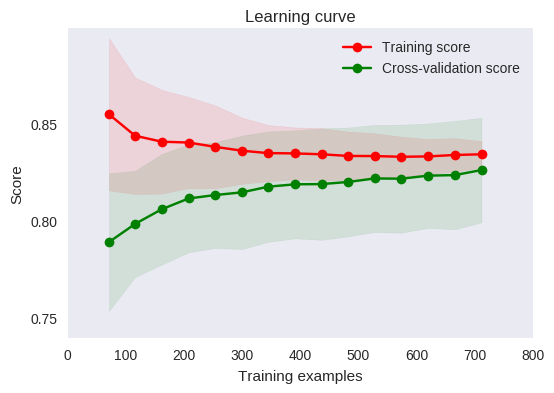

In [728]:
#learn curve
logreg  = LogisticRegression(C=10)

if plot_lc==1:
    train_size=np.linspace(.1, 1.0, 15)
    Learning_curve_model(X_train, Y_train, logreg, cv, train_size)

In [729]:
# Logistic Regression 
acc_log = predict_model(X_train, Y_train, logreg, X_test, 'submission_Logistic.csv')
acc_log

array([ 0.84916201,  0.82122905,  0.79888268,  0.82681564,  0.84357542,
        0.82681564,  0.79888268,  0.82122905,  0.80446927,  0.83240223,
        0.82681564,  0.81564246,  0.82122905,  0.82681564,  0.79888268,
        0.83798883,  0.81564246,  0.86592179,  0.80446927,  0.84916201,
        0.83240223,  0.83240223,  0.79329609,  0.82681564,  0.84916201,
        0.8603352 ,  0.83240223,  0.8603352 ,  0.72625698,  0.83798883,
        0.87150838,  0.8547486 ,  0.8547486 ,  0.86592179,  0.84357542,
        0.82681564,  0.77653631,  0.84916201,  0.84916201,  0.78212291,
        0.7877095 ,  0.82122905,  0.7877095 ,  0.80446927,  0.82122905,
        0.78212291,  0.86592179,  0.83798883,  0.82122905,  0.83240223,
        0.77653631,  0.82122905,  0.79329609,  0.82681564,  0.8603352 ,
        0.80446927,  0.81564246,  0.7877095 ,  0.84916201,  0.81005587,
        0.84357542,  0.84357542,  0.81564246,  0.84357542,  0.80446927,
        0.7877095 ,  0.77094972,  0.83798883,  0.79888268,  0.86

In [730]:
acc_log.mean()

0.82687150837988843

## SVM

In [1614]:
search_param = 1   # 1 -- grid search / 0 -- don't search
plot_vc      = 0   # 1--display validation curve/ 0-- don't display
plot_lc      = 1   # 1--display learning curve/ 0 -- don't display

In [1615]:
#grid search: SVM
#search_param = 0
if search_param==1:
    param_range = np.linspace(0.1, 10, 10)
    param_grid = dict(C=param_range)

    grid_search_model(X_train, Y_train, SVC(), param_grid, cv)

Best Score: 0.831117318436  / Best parameters: {'C': 1.2000000000000002}


In [1539]:
#Validation Curve: SVC
if plot_vc == 1:
    param_range = np.linspace(0.1, 10, 10)
    param_name="C"
    ylim=[0.78, 0.90]
    validation_curve_model(X_train, Y_train, SVC(), "C", param_range, cv, ylim, log=False)

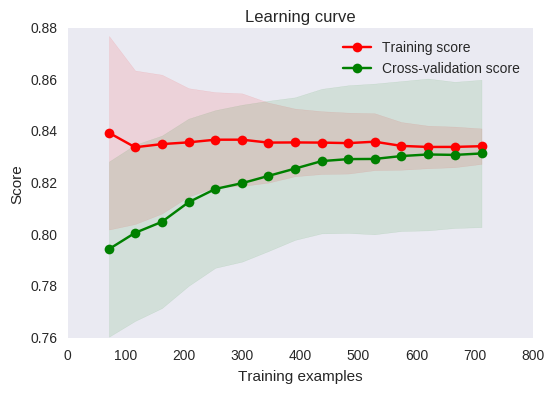

In [1463]:
#learn curve: SVC
svc = SVC(C=0.621, probability=True)

if plot_lc == 1:
    train_size=np.linspace(.1, 1.0, 15)
    Learning_curve_model(X_train, Y_train, svc, cv, train_size)

In [1464]:
# Support Vector Machines
acc_svc = predict_model(X_train, Y_train, svc, X_test, 'submission_SVM.csv')
acc_svc

array([ 0.83240223,  0.82681564,  0.79888268,  0.82681564,  0.83798883,
        0.82122905,  0.82122905,  0.81005587,  0.81564246,  0.82681564,
        0.84357542,  0.82681564,  0.81005587,  0.83798883,  0.80446927,
        0.84357542,  0.81564246,  0.87709497,  0.79888268,  0.84357542,
        0.84916201,  0.86592179,  0.79888268,  0.84357542,  0.84916201,
        0.84357542,  0.83240223,  0.86592179,  0.72067039,  0.84357542,
        0.88826816,  0.86592179,  0.8547486 ,  0.82681564,  0.84357542,
        0.82681564,  0.80446927,  0.8547486 ,  0.84916201,  0.7877095 ,
        0.79329609,  0.83798883,  0.77094972,  0.78212291,  0.84916201,
        0.79329609,  0.86592179,  0.83798883,  0.82122905,  0.82122905,
        0.81564246,  0.81005587,  0.84357542,  0.8603352 ,  0.87709497,
        0.80446927,  0.83240223,  0.78212291,  0.84916201,  0.81005587,
        0.83798883,  0.83240223,  0.81005587,  0.84357542,  0.83240223,
        0.78212291,  0.77653631,  0.84357542,  0.77653631,  0.89

In [1465]:
acc_svc.mean()

0.83156424581005595

## KNN

In [737]:
search_param = 1   # 1 -- grid search / 0 -- don't search
plot_vc      = 0   # 1--display validation curve/ 0-- don't display
plot_lc      = 1   # 1--display learning curve/ 0 -- don't display

In [738]:
#grid search: KNN
if search_param==1:
    param_range = (np.linspace(1, 10, 10)).astype(int)
    param_grid = dict(n_neighbors=param_range)

    grid_search_model(X_train, Y_train, KNeighborsClassifier(), param_grid, cv)

Best Score: 0.824581005587  / Best parameters: {'n_neighbors': 10}


In [739]:
#Validation Curve: KNN
if plot_vc==1:
    param_range = np.linspace(2, 20, 10).astype(int)
    param_name="n_neighbors"
    ylim=[0.75, 0.90]
    validation_curve_model(X_train, Y_train, KNeighborsClassifier(), "n_neighbors", param_range, cv, ylim, log=False)

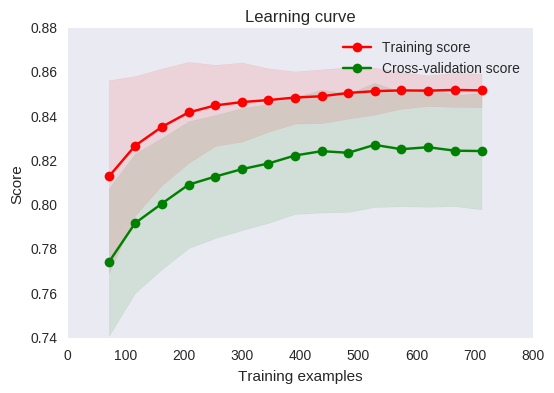

In [740]:
#learn curve: KNN
knn = KNeighborsClassifier(n_neighbors = 10)

if plot_lc==1:
    train_size=np.linspace(.1, 1.0, 15)
    Learning_curve_model(X_train, Y_train, knn, cv, train_size)

In [741]:
# KNN
acc_knn = predict_model(X_train, Y_train, knn, X_test, 'submission_KNN.csv')
acc_knn

array([ 0.84916201,  0.83798883,  0.81005587,  0.82681564,  0.81005587,
        0.84357542,  0.81564246,  0.77653631,  0.83240223,  0.84357542,
        0.82681564,  0.83240223,  0.80446927,  0.83240223,  0.83240223,
        0.83798883,  0.84357542,  0.83240223,  0.81005587,  0.82681564,
        0.84357542,  0.7877095 ,  0.79329609,  0.82122905,  0.83240223,
        0.83798883,  0.81005587,  0.8547486 ,  0.72625698,  0.83240223,
        0.84916201,  0.84916201,  0.84916201,  0.84916201,  0.84916201,
        0.82122905,  0.79329609,  0.8603352 ,  0.84916201,  0.78212291,
        0.80446927,  0.83798883,  0.79888268,  0.78212291,  0.83240223,
        0.7877095 ,  0.86592179,  0.81564246,  0.83240223,  0.83798883,
        0.82122905,  0.82122905,  0.83240223,  0.82681564,  0.86592179,
        0.81005587,  0.82122905,  0.81564246,  0.83798883,  0.82681564,
        0.84357542,  0.84916201,  0.80446927,  0.84916201,  0.7877095 ,
        0.7877095 ,  0.77094972,  0.81564246,  0.79329609,  0.87

In [742]:
acc_knn.mean()

0.82458100558659231

## Naive Bayes

In [170]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
acc_gaussian = predict_model(X_train, Y_train, gaussian, X_test, 'submission_Gassian_Naive_Bayes.csv')
acc_gaussian

array([ 0.75418994,  0.78212291,  0.75418994,  0.73184358,  0.75977654,
        0.77653631,  0.75418994,  0.79329609,  0.76536313,  0.75418994,
        0.72067039,  0.70391061,  0.74301676,  0.7877095 ,  0.76536313,
        0.77094972,  0.70949721,  0.7877095 ,  0.74860335,  0.72625698,
        0.76536313,  0.7150838 ,  0.74301676,  0.79888268,  0.7150838 ,
        0.7877095 ,  0.72067039,  0.83798883,  0.70391061,  0.73743017,
        0.74301676,  0.79888268,  0.76536313,  0.77653631,  0.7877095 ,
        0.74860335,  0.77094972,  0.7877095 ,  0.77094972,  0.74301676,
        0.77653631,  0.77094972,  0.73184358,  0.77653631,  0.79888268,
        0.72625698,  0.74860335,  0.76536313,  0.75977654,  0.75418994,
        0.82122905,  0.7877095 ,  0.74860335,  0.72625698,  0.75977654,
        0.73743017,  0.74860335,  0.75418994,  0.75977654,  0.77653631,
        0.75418994,  0.79329609,  0.76536313,  0.80446927,  0.70949721,
        0.73184358,  0.70391061,  0.75418994,  0.70949721,  0.76

## eXtreme Gradient Boosting/Extra Trees 

In [380]:
#clf_xgb = xgb.XGBClassifier(
#    max_depth=2,
#    n_estimators=500,
#    subsample=0.5,
#    learning_rate=0.1
#    )
clf_ext = ExtraTreesClassifier(
    max_features='auto',
    bootstrap=True,
    oob_score=True,
    n_estimators=1000,
    max_depth=None,
    min_samples_split=10
    #class_weight="balanced",
    #min_weight_fraction_leaf=0.02
    )

acc_ext = predict_model(X_train, Y_train, clf_ext, X_test, 'submission_Ext.csv')
acc_ext

array([ 0.8358209 ,  0.8358209 ,  0.76865672,  0.80597015,  0.81343284,
        0.80597015,  0.79850746,  0.80597015,  0.84328358,  0.84328358,
        0.85074627,  0.80597015,  0.82089552,  0.81343284,  0.8358209 ,
        0.80597015,  0.82835821,  0.81343284,  0.82089552,  0.78358209,
        0.82835821,  0.84328358,  0.79104478,  0.82835821,  0.80597015,
        0.84328358,  0.85820896,  0.8358209 ,  0.68656716,  0.85074627,
        0.84328358,  0.85820896,  0.82835821,  0.82089552,  0.84328358,
        0.8358209 ,  0.7761194 ,  0.87313433,  0.85820896,  0.74626866,
        0.79850746,  0.82835821,  0.79850746,  0.79104478,  0.85820896,
        0.82835821,  0.8358209 ,  0.82089552,  0.82089552,  0.79850746,
        0.82835821,  0.79850746,  0.8358209 ,  0.79850746,  0.88059701,
        0.82089552,  0.76119403,  0.8358209 ,  0.8358209 ,  0.7761194 ,
        0.8358209 ,  0.8358209 ,  0.79104478,  0.82835821,  0.80597015,
        0.76865672,  0.7761194 ,  0.78358209,  0.79104478,  0.85

In [382]:
acc_ext.mean()

0.81999999999999995

## Perceptron

In [171]:
# Perceptron
perceptron = Perceptron()
acc_perceptron = predict_model(X_train, Y_train, perceptron, X_test, 'submission_Perception.csv')
acc_perceptron

array([ 0.77653631,  0.59776536,  0.75418994,  0.77653631,  0.79329609,
        0.75977654,  0.77094972,  0.79888268,  0.39106145,  0.81564246,
        0.82122905,  0.75418994,  0.73184358,  0.74860335,  0.60893855,
        0.41340782,  0.73743017,  0.72625698,  0.62569832,  0.76536313,
        0.69832402,  0.75418994,  0.58659218,  0.77094972,  0.78212291,
        0.77653631,  0.74860335,  0.81564246,  0.69832402,  0.7877095 ,
        0.70391061,  0.81564246,  0.83798883,  0.81564246,  0.82122905,
        0.40782123,  0.74301676,  0.80446927,  0.82681564,  0.77094972,
        0.39664804,  0.45251397,  0.76536313,  0.74301676,  0.47486034,
        0.75977654,  0.69273743,  0.80446927,  0.68715084,  0.75977654,
        0.78212291,  0.79329609,  0.7150838 ,  0.81564246,  0.70949721,
        0.69273743,  0.77094972,  0.69832402,  0.78212291,  0.4301676 ,
        0.79888268,  0.80446927,  0.75418994,  0.83240223,  0.68715084,
        0.7150838 ,  0.68715084,  0.60335196,  0.70949721,  0.64

## Linear SVC

In [172]:
# Linear SVC
linear_svc = LinearSVC()
acc_linear_svc = predict_model(X_train, Y_train, linear_svc, X_test, 'submission_Linear_SVC.csv')
acc_linear_svc

array([ 0.81564246,  0.79888268,  0.76536313,  0.81005587,  0.82122905,
        0.81564246,  0.79888268,  0.79329609,  0.75977654,  0.79329609,
        0.82681564,  0.78212291,  0.7877095 ,  0.81005587,  0.78212291,
        0.83240223,  0.77653631,  0.82681564,  0.7877095 ,  0.81005587,
        0.81564246,  0.77653631,  0.78212291,  0.80446927,  0.77653631,
        0.82681564,  0.79888268,  0.84916201,  0.7150838 ,  0.81005587,
        0.83240223,  0.83240223,  0.84357542,  0.83798883,  0.82681564,
        0.81005587,  0.74301676,  0.83240223,  0.82122905,  0.76536313,
        0.77653631,  0.80446927,  0.7150838 ,  0.79888268,  0.82122905,
        0.77094972,  0.79329609,  0.84916201,  0.80446927,  0.81005587,
        0.75977654,  0.82122905,  0.7877095 ,  0.78212291,  0.83240223,
        0.77653631,  0.81564246,  0.74860335,  0.81564246,  0.79888268,
        0.82681564,  0.82681564,  0.82122905,  0.83798883,  0.77094972,
        0.77653631,  0.75977654,  0.77653631,  0.75418994,  0.82

## Stochastic Gradient Descent

In [173]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
acc_sgd = predict_model(X_train, Y_train, sgd, X_test, 'submission_stochastic_Gradient_Descent.csv')
acc_sgd

array([ 0.77094972,  0.78212291,  0.68715084,  0.65363128,  0.81564246,
        0.7877095 ,  0.79888268,  0.76536313,  0.78212291,  0.65921788,
        0.6424581 ,  0.74860335,  0.39664804,  0.47486034,  0.68715084,
        0.74301676,  0.75418994,  0.77094972,  0.70949721,  0.65921788,
        0.76536313,  0.78212291,  0.77094972,  0.70949721,  0.75977654,
        0.77094972,  0.74860335,  0.82122905,  0.65363128,  0.74860335,
        0.63128492,  0.64804469,  0.36312849,  0.40782123,  0.82122905,
        0.74301676,  0.67597765,  0.70391061,  0.74301676,  0.77653631,
        0.76536313,  0.77653631,  0.7877095 ,  0.67597765,  0.82681564,
        0.75977654,  0.78212291,  0.7877095 ,  0.81005587,  0.73743017,
        0.7150838 ,  0.78212291,  0.75418994,  0.77094972,  0.65363128,
        0.72067039,  0.76536313,  0.76536313,  0.72625698,  0.74301676,
        0.53072626,  0.36312849,  0.72625698,  0.75418994,  0.7150838 ,
        0.78212291,  0.73184358,  0.77094972,  0.72625698,  0.79

## Decision Tree

In [174]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
acc_decision_tree = predict_model(X_train, Y_train, decision_tree, X_test, 'submission_Decision_Tree.csv')
acc_decision_tree

array([ 0.82122905,  0.82122905,  0.79329609,  0.80446927,  0.7877095 ,
        0.81564246,  0.81564246,  0.78212291,  0.75977654,  0.83240223,
        0.81005587,  0.79329609,  0.77094972,  0.82681564,  0.81005587,
        0.77653631,  0.79329609,  0.82122905,  0.81005587,  0.80446927,
        0.82681564,  0.81564246,  0.75977654,  0.81564246,  0.80446927,
        0.82122905,  0.7877095 ,  0.84916201,  0.70391061,  0.83240223,
        0.84357542,  0.8547486 ,  0.81564246,  0.83798883,  0.81005587,
        0.79888268,  0.78212291,  0.81564246,  0.81564246,  0.77653631,
        0.79888268,  0.83240223,  0.80446927,  0.77094972,  0.79888268,
        0.7877095 ,  0.86592179,  0.78212291,  0.82122905,  0.81564246,
        0.7877095 ,  0.82681564,  0.83240223,  0.79888268,  0.87150838,
        0.7877095 ,  0.79329609,  0.80446927,  0.79888268,  0.7877095 ,
        0.83240223,  0.82681564,  0.80446927,  0.82681564,  0.77094972,
        0.80446927,  0.73743017,  0.79888268,  0.76536313,  0.88

## Random Forest

In [383]:
search_param = 0   # 1 -- grid search / 0 -- don't search
plot_vc      = 0   # 1--display validation curve/ 0-- don't display
plot_lc      = 1   # 1--display learning curve/ 0 -- don't display

In [384]:
#grid search: Random Forest (This step is very slow)
#param_range = (np.linspace(10, 110, 10)).astype(int)
#param_leaf = (np.linspace(1, 2, 2)).astype(int)
#param_grid = {'n_estimators':param_range, 'min_samples_leaf':param_leaf}

#grid_search_model(X_data, Y_data, RandomForestClassifier(), param_grid, cv)

In [385]:
if plot_vc==1:
    param_range = np.linspace(10, 110, 10).astype(int)
    ylim=[0.75, 0.90]
    validation_curve_model(X_data, Y_data, RandomForestClassifier(min_samples_leaf=12), "n_estimators", param_range, cv, ylim, log=False)

In [386]:
if plot_vc==1:
    param_range = np.linspace(1, 21, 10).astype(int)
    ylim=[0.75, 0.90]
    validation_curve_model(X_train, Y_train, RandomForestClassifier(n_estimators=80), "min_samples_leaf", param_range, cv, ylim, log=False)

In [1455]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=80, random_state =0, min_samples_leaf = 12)
acc_random_forest = predict_model(X_train, Y_train, random_forest, X_test, 'submission_random_forest.csv')
acc_random_forest

array([ 0.84357542,  0.81564246,  0.79888268,  0.82122905,  0.83240223,
        0.83240223,  0.81564246,  0.83240223,  0.81564246,  0.84357542,
        0.83240223,  0.82681564,  0.82122905,  0.83240223,  0.80446927,
        0.83798883,  0.82122905,  0.8547486 ,  0.79888268,  0.84357542,
        0.84357542,  0.83240223,  0.80446927,  0.84916201,  0.8547486 ,
        0.86592179,  0.82122905,  0.8547486 ,  0.70949721,  0.83240223,
        0.87709497,  0.87150838,  0.86592179,  0.83240223,  0.84916201,
        0.82681564,  0.78212291,  0.8603352 ,  0.84916201,  0.79329609,
        0.80446927,  0.82681564,  0.76536313,  0.78212291,  0.81564246,
        0.80446927,  0.86592179,  0.84357542,  0.81005587,  0.82122905,
        0.79888268,  0.81564246,  0.82681564,  0.8603352 ,  0.87150838,
        0.79329609,  0.82681564,  0.78212291,  0.8547486 ,  0.81005587,
        0.83798883,  0.82122905,  0.82681564,  0.84916201,  0.82681564,
        0.7877095 ,  0.77653631,  0.83798883,  0.77094972,  0.86

In [1456]:
acc_random_forest.mean()

0.8283240223463687

In [177]:
#ensemble votring
ensemble_voting = VotingClassifier(estimators=[('lg', logreg), ('nb', gaussian), ('SVM', svc), ('knn', knn), ('rf', random_forest),('dt',decision_tree)], voting='soft')
acc_ensemble_voting = predict_model(X_train, Y_train, ensemble_voting, X_test, 'submission_ensemble_voting.csv')

In [178]:
acc_ensemble_voting

array([ 0.83798883,  0.83240223,  0.79888268,  0.82122905,  0.82681564,
        0.82681564,  0.81564246,  0.81005587,  0.79888268,  0.84916201,
        0.82681564,  0.82681564,  0.82122905,  0.83798883,  0.81564246,
        0.84357542,  0.7877095 ,  0.83798883,  0.81564246,  0.83798883,
        0.83240223,  0.83240223,  0.79329609,  0.84357542,  0.83798883,
        0.84916201,  0.80446927,  0.8547486 ,  0.70391061,  0.8547486 ,
        0.84916201,  0.86592179,  0.83798883,  0.84357542,  0.83240223,
        0.81564246,  0.79329609,  0.84916201,  0.84357542,  0.77653631,
        0.78212291,  0.82681564,  0.80446927,  0.7877095 ,  0.8547486 ,
        0.79329609,  0.84916201,  0.84357542,  0.82122905,  0.82681564,
        0.81005587,  0.81005587,  0.82681564,  0.82122905,  0.86592179,
        0.79888268,  0.83240223,  0.79888268,  0.84357542,  0.80446927,
        0.82122905,  0.83240223,  0.82681564,  0.8547486 ,  0.81005587,
        0.77653631,  0.77094972,  0.83798883,  0.78212291,  0.88

In [179]:
acc_ensemble_voting.mean()

0.82502793296089383

In [187]:
hard_vote = VotingClassifier(
    estimators=[
        #('tree', clf_tree),
        ('knn', knn),
        ('svm', svc),
        ('extra', clf_ext),
       #('gb', clf_gb),
        ('rf', random_forest),
        ('NB', gaussian),
        ('logistic', logreg),
        #('RF', clf_rf),
        ],
    weights=[3,3,2,2,1,2],
    voting='hard')
acc_ensemble_hard_voting = predict_model(X_train, Y_train, hard_vote, X_test, 'submission_hard_voting.csv')

In [189]:
acc_ensemble_hard_voting.mean()

0.82893854748603357